In [128]:
import numpy as np
import math
import os
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline, UnivariateSpline
import matplotlib.pyplot as plt
from constants import *
from background import *
from EOS import set_eos
from RK import rk3_step, rk4_step
from scipy.optimize import fsolve
from Eq_freqD import *

In [129]:
e_pAPR, dataAPR, cs2_eAPR, pAPR, cs2APR, gamma_inverAPR, eAPR, p_eAPR = set_eos('apr.csv')
e_pMPA1, dataMPA1, cs2_eMPA1, pMPA1, cs2MPA1, gamma_inverMPA1, eMPA1, p_eMPA1 = set_eos('mpa1.csv')
e_pMS1, dataMS1, cs2_eMS1, pMS1, cs2MS1, gamma_inverMS1, eMS1, p_eMS1 = set_eos('ms1.csv')
e_pWFF1, dataWFF1, cs2_eWFF1, pWFF1, cs2WFF1, gamma_inverWFF1, eWFF1, p_eWFF1 = set_eos('wff1.csv')

In [130]:
dr = 0.001

pcAPR_adim, rAPR_dim, mAPR_dim = mass_radius('apr.csv', dr)
pcMPA1_adim, rMPA1_dim, mMPA1_dim = mass_radius('mpa1.csv', dr)
pcMS1_adim, rMS1_dim, mMS1_dim = mass_radius('ms1.csv', dr)
pcWFF1_adim, rWFF1_dim, mWFF1_dim = mass_radius('wff1.csv', dr)

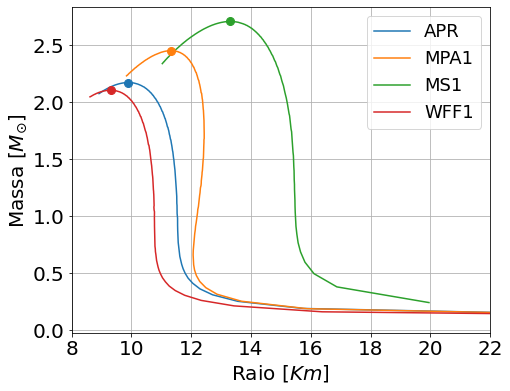

In [131]:
plt.figure(figsize=(7.5,6))
plt.plot(rAPR_dim, mAPR_dim, label="APR")
plt.plot(rMPA1_dim, mMPA1_dim,label="MPA1")
plt.plot(rMS1_dim, mMS1_dim, label="MS1")
plt.plot(rWFF1_dim, mWFF1_dim, label="WFF1")
plt.xlabel(r"Raio$\ [Km]$", fontsize=20)
plt.ylabel(r"Massa$\ [M_{\odot}]$", fontsize=20)
plt.grid()
plt.xlim(8,22)
plt.xticks(fontsize=20, ticks=np.arange(8, 23, 2))
plt.yticks(fontsize=20, ticks=np.arange(0, 3.1, 0.5))
plt.legend(fontsize=18)

i_APR = mAPR_dim.index(max(mAPR_dim))
errox_APR = abs(rAPR_dim[i_APR-1]-rAPR_dim[i_APR+1])/2
erroy_APR = abs(mAPR_dim[i_APR-1]-mAPR_dim[i_APR+1])/2
plt.plot(rAPR_dim[i_APR], mAPR_dim[i_APR], 'o', color='C0', markersize=8)

i_MPA1 = mMPA1_dim.index(max(mMPA1_dim))
plt.plot(rMPA1_dim[i_MPA1], mMPA1_dim[i_MPA1], 'o' , color='C1', markersize=8)

i_MS1 = mMS1_dim.index(max(mMS1_dim))
plt.plot(rMS1_dim[i_MS1], mMS1_dim[i_MS1], 'o', color='C2', markersize=8)

i_WFF1 = mWFF1_dim.index(max(mWFF1_dim))
plt.plot(rWFF1_dim[i_WFF1], mWFF1_dim[i_WFF1], 'o', color='C3', markersize=8)


#plt.savefig("MxR.pdf", bbox_inches='tight')

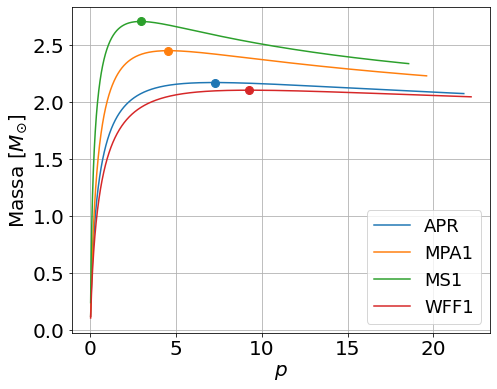

In [133]:
plt.figure(figsize=(7.5,6))
plt.plot(pcAPR_adim, mAPR_dim, label="APR")
plt.plot(pcMPA1_adim, mMPA1_dim,label="MPA1")
plt.plot(pcMS1_adim, mMS1_dim, label="MS1")
plt.plot(pcWFF1_adim, mWFF1_dim, label="WFF1")
plt.xlabel(r"$p$", fontsize=20)
plt.ylabel(r"Massa$\ [M_{\odot}]$", fontsize=20)
plt.grid()
#plt.xlim(8,22)
plt.xticks(fontsize=20)#, ticks=np.arange(8, 23, 2))
plt.yticks(fontsize=20)#, ticks=np.arange(0, 3.1, 0.5))
plt.legend(fontsize=18)

i_APR = mAPR_dim.index(max(mAPR_dim))
errox_APR = abs(rAPR_dim[i_APR-1]-rAPR_dim[i_APR+1])/2
erroy_APR = abs(mAPR_dim[i_APR-1]-mAPR_dim[i_APR+1])/2
plt.plot(pcAPR_adim[i_APR], mAPR_dim[i_APR], 'o', color='C0', markersize=8)

i_MPA1 = mMPA1_dim.index(max(mMPA1_dim))
plt.plot(pcMPA1_adim[i_MPA1], mMPA1_dim[i_MPA1], 'o' , color='C1', markersize=8)

i_MS1 = mMS1_dim.index(max(mMS1_dim))
plt.plot(pcMS1_adim[i_MS1], mMS1_dim[i_MS1], 'o', color='C2', markersize=8)

i_WFF1 = mWFF1_dim.index(max(mWFF1_dim))
plt.plot(pcWFF1_adim[i_WFF1], mWFF1_dim[i_WFF1], 'o', color='C3', markersize=8)


#plt.savefig("MxR.pdf", bbox_inches='tight')

In [160]:
mWFF1_dim[10]

0.5210189590705308

In [161]:
pcWFF1_adim[10]

0.12099190974541676

In [72]:
def dim(list):
    list_dim = [element * rho_dim for element in list]
    return list_dim

In [73]:
eAPR_dim = dim(eAPR)
pAPR_dim = dim(pAPR)

eMPA1_dim = dim(eMPA1)
pMPA1_dim = dim(pMPA1)

eMS1_dim = dim(eMS1)
pMS1_dim = dim(pMS1)

eWFF1_dim = dim(eWFF1)
pWFF1_dim = dim(pWFF1)

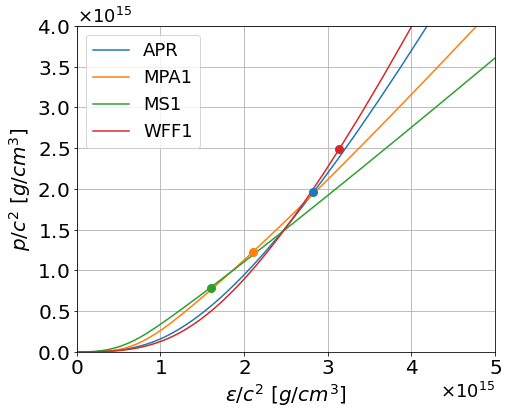

In [74]:
plt.figure(figsize=(7.5,6))
plt.plot(eAPR_dim, pAPR_dim, label="APR")
plt.plot(eMPA1_dim, pMPA1_dim, label="MPA1")
plt.plot(eMS1_dim, pMS1_dim, label="MS1")
plt.plot(eWFF1_dim, pWFF1_dim, label="WFF1")
plt.ylabel(r"$p/c^2 \ [g/cm^3]$", fontsize=20)
plt.xlabel(r"$\epsilon/c^2 \ [g/cm^3]$", fontsize=20)
plt.grid()
plt.xlim(0,5e15)
plt.ylim(0,4e15)
plt.xticks(fontsize=20) #, ticks=np.arange(8, 23, 2))
plt.yticks(fontsize=20) #, ticks=np.arange(0, 3.1, 0.5))
plt.legend(fontsize=18)
plt.ticklabel_format(style='sci', axis='both', useMathText=True)
plt.gca().xaxis.get_offset_text().set_fontsize(18)
plt.gca().yaxis.get_offset_text().set_fontsize(18)

plt.plot(e_pAPR(pcAPR_adim[i_APR])*rho_dim, pcAPR_adim[i_APR]*rho_dim, 'o', color='C0', markersize=8)

plt.plot(e_pMPA1(pcMPA1_adim[i_MPA1])*rho_dim, pcMPA1_adim[i_MPA1]*rho_dim, 'o', color='C1', markersize=8)

plt.plot(e_pMS1(pcMS1_adim[i_MS1])*rho_dim, pcMS1_adim[i_MS1]*rho_dim, 'o', color='C2', markersize=8)

plt.plot(e_pWFF1(pcWFF1_adim[i_WFF1])*rho_dim, pcWFF1_adim[i_WFF1]*rho_dim, 'o', color='C3', markersize=8)

#plt.savefig("pXe.pdf", bbox_inches='tight')

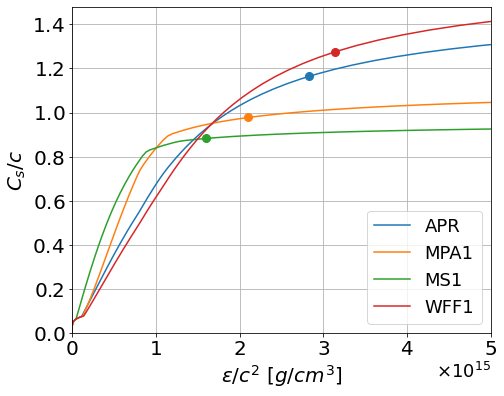

In [75]:
cs2APR_sqrt = [math.sqrt(element) for element in cs2APR]
cs2MPA1_sqrt = [math.sqrt(element) for element in cs2MPA1]
cs2MS1_sqrt = [math.sqrt(element) for element in cs2MS1]
cs2WFF1_sqrt = [math.sqrt(element) for element in cs2WFF1]

plt.figure(figsize=(7.5,6))
plt.plot(eAPR_dim, cs2APR_sqrt, label="APR")
plt.plot(eMPA1_dim, cs2MPA1_sqrt, label="MPA1")
plt.plot(eMS1_dim, cs2MS1_sqrt, label="MS1")
plt.plot(eWFF1_dim, cs2WFF1_sqrt, label="WFF1")
plt.ylabel(r"$C_s/c \ $", fontsize=20)
plt.xlabel(r"$\epsilon/c^2 \ [g/cm^3]$", fontsize=20)
plt.grid()
plt.xlim(0,5e15)
plt.ylim(0, 1.48)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20, ticks=np.arange(0, 1.6, 0.2))
plt.legend(fontsize=18)
plt.ticklabel_format(style='sci', axis='both', useMathText=True)
plt.gca().xaxis.get_offset_text().set_fontsize(18)

plt.plot(e_pAPR(pcAPR_adim[i_APR])*rho_dim, math.sqrt(cs2_eAPR(e_pAPR(pcAPR_adim[i_APR]))), 'o', color='C0', markersize=8)

plt.plot(e_pMPA1(pcMPA1_adim[i_MPA1])*rho_dim, math.sqrt(cs2_eMPA1(e_pMPA1(pcMPA1_adim[i_MPA1]))), 'o', color='C1', markersize=8)

plt.plot(e_pMS1(pcMS1_adim[i_MS1])*rho_dim, math.sqrt(cs2_eMS1(e_pMS1(pcMS1_adim[i_MS1]))), 'o', color='C2', markersize=8)

plt.plot(e_pWFF1(pcWFF1_adim[i_WFF1])*rho_dim, math.sqrt(cs2_eWFF1(e_pWFF1(pcWFF1_adim[i_WFF1]))), 'o', color='C3', markersize=8)

#plt.savefig("cs2Xe.pdf",  bbox_inches='tight')

In [76]:
def gamma(e, p_e, gamma_inver):
    pe = []
    gamma = []

    for i in range(len(e)):
        pe.append(p_e(e[i]))
        gamma.append(1/gamma_inver(math.log(pe[i])))
        
    return gamma    

In [77]:
gammaAPR = gamma(eAPR, p_eAPR, gamma_inverAPR)
gammaMPA1 = gamma(eMPA1, p_eMPA1, gamma_inverMPA1)
gammaMS1 = gamma(eMS1, p_eMS1, gamma_inverMS1)
gammaWFF1 = gamma(eWFF1, p_eWFF1, gamma_inverWFF1)

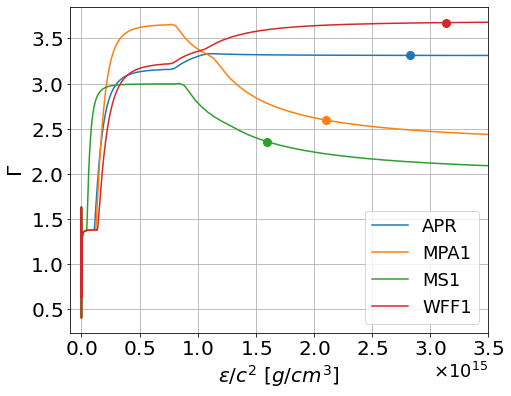

In [114]:
plt.figure(figsize=(7.5,6))
plt.plot(eAPR_dim, gammaAPR, label="APR")
plt.plot(eMPA1_dim, gammaMPA1, label="MPA1")
plt.plot(eMS1_dim, gammaMS1, label="MS1")
plt.plot(eWFF1_dim, gammaWFF1, label="WFF1")
plt.xlabel(r"$\epsilon/c^2 \ [g/cm^3]$", fontsize=20)
plt.ylabel(r"$\Gamma \ $", fontsize=20)
plt.grid()
plt.xlim(-0.1e15, 3.5e15)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.legend(fontsize=18)
plt.ticklabel_format(style='sci', axis='both', useMathText=True)
plt.gca().xaxis.get_offset_text().set_fontsize(18)

plt.plot(e_pAPR(pcAPR_adim[i_APR])*rho_dim, 1/gamma_inverAPR(math.log(pcAPR_adim[i_APR])), 'o', color='C0', markersize=8)

plt.plot(e_pMPA1(pcMPA1_adim[i_MPA1])*rho_dim, 1/gamma_inverMPA1(math.log(pcMPA1_adim[i_MPA1])), 'o', color='C1', markersize=8)

plt.plot(e_pMS1(pcMS1_adim[i_MS1])*rho_dim, 1/gamma_inverMS1(math.log(pcMS1_adim[i_MS1])), 'o', color='C2', markersize=8)

plt.plot(e_pWFF1(pcWFF1_adim[i_WFF1])*rho_dim, 1/gamma_inverWFF1(math.log(pcWFF1_adim[i_WFF1])), 'o', color='C3', markersize=8)

#plt.savefig("gammaXe.pdf", bbox_inches='tight')